In [1]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

In [2]:
# pluto = gpd.read_file("C:\Users\daiyu\Documents\GitHub\cdp-mapping-systems\Data\nyc_mappluto_24v1_1_shp\MapPLUTO.shp.xml")

In [3]:
pluto_ogrio = ogr.read_dataframe(r"C:\Users\daiyu\Documents\GitHub\cdp-mapping-systems\Data\nyc_mappluto_24v1_1_shp\MapPLUTO.shp")

In [4]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

# Path to your Excel file
file_path = r"C:\Users\daiyu\Desktop\colliquim 1\assignment 3\condo_point_w_name.csv"

# Read the Excel file
df = pd.read_csv(file_path)

# Print the contents of the DataFrame
print(df)

   NAME  latitude_y  longitude_x
0     1   40.743222   -73.975799
1     2   40.724560   -74.006593
2     3   40.783668   -73.950137
3     4   40.748139   -73.956396
4     5   40.681487   -73.964257
5     6   40.691065   -73.990037
6     7   40.705217   -74.007712
7     8   40.745646   -74.006643
8     9   40.761765   -73.971926
9    10   40.786284   -73.977463


In [8]:
import pyogrio as ogr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

nyc_map = ogr.read_dataframe(r"C:\Users\daiyu\Documents\GitHub\cdp-mapping-systems\Data\nyc_mappluto_24v1_1_shp\MapPLUTO.shp")

In [9]:
condo_df = pd.read_csv(file_path)

In [10]:
condo_df = gpd.GeoDataFrame(condo_df, geometry=gpd.points_from_xy(condo_df.longitude_x, condo_df.latitude_y))

NYC Map CRS: EPSG:2263
Condo CRS: EPSG:4326


Text(56.972222222222214, 0.5, 'Latitude ')

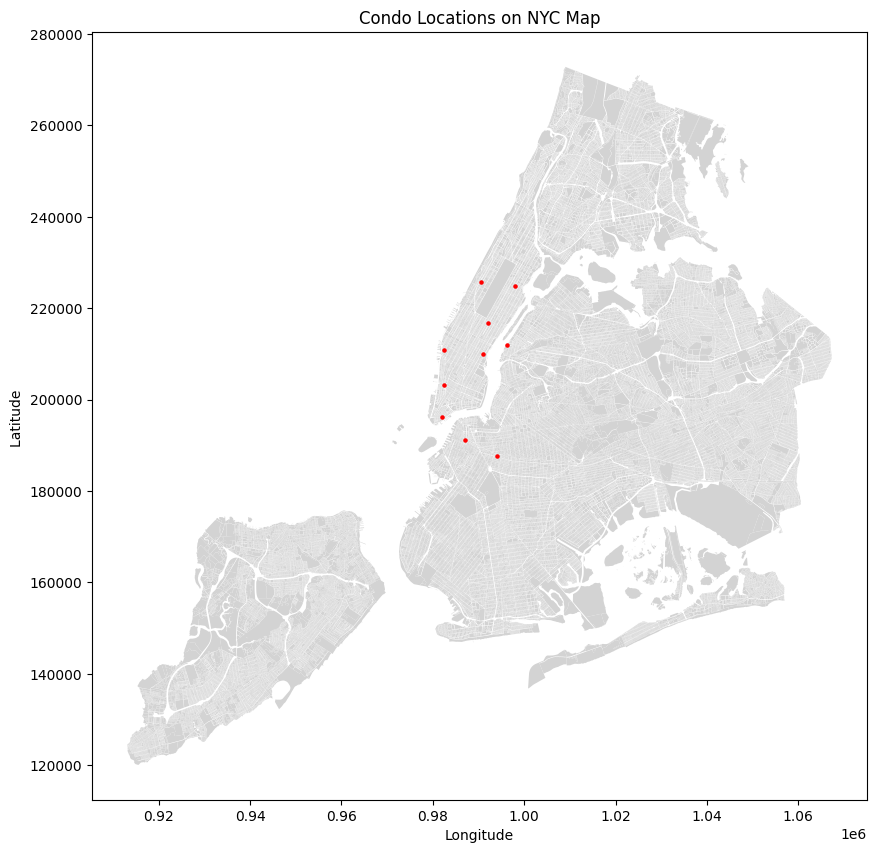

In [14]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming nyc_map and condo_df are your GeoDataFrames
# Set a CRS if it's not already set
if nyc_map.crs is None:
    nyc_map.set_crs("EPSG:4326", inplace=True)  # Assuming WGS 84 for example
if condo_df.crs is None:
    condo_df.set_crs("EPSG:4326", inplace=True)  # Assuming WGS 84 for example

# Check CRS of both datasets
print(f"NYC Map CRS: {nyc_map.crs}")
print(f"Condo CRS: {condo_df.crs}")

# If they don't match, transform condo_df to match nyc_map CRS
if nyc_map.crs != condo_df.crs:
    condo_df = condo_df.to_crs(nyc_map.crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot NYC map
nyc_map.plot(ax=ax, color='lightgrey')

# Plot condo locations
condo_df.plot(ax=ax, color='red', markersize=5)

# Add title and labels
plt.title('Condo Locations on NYC Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude ')

